### 시계열 자료의 탐색

`-` 계절형 시계열의 분해

> 1년을 주기로 계절성을 가지는 시계열 자료(기온, 강수량, 수입, 수출 등

$$x_t = T_t + S_t + a_t, ~ a_t \sim N(0, \sigma^2)$$

$T_t$ : 추세, $S_t$ : 계절성, $a_t$ : 잡음

In [1]:
setwd("~/R/EDA/data/")

In [2]:
Export = read.table("export.txt", header = T)

In [3]:
attach(Export)

In [6]:
Series = ts(export.1000/1000, start = c(1988, 1), frequency = 12)

In [9]:
decomp.out = decompose(log(Series))

[1] -0.0747 -0.0871  0.0309  0.0171  0.0234  0.0287  0.0017 -0.0291  0.0118
[10]  0.0436  0.0235  0.0102

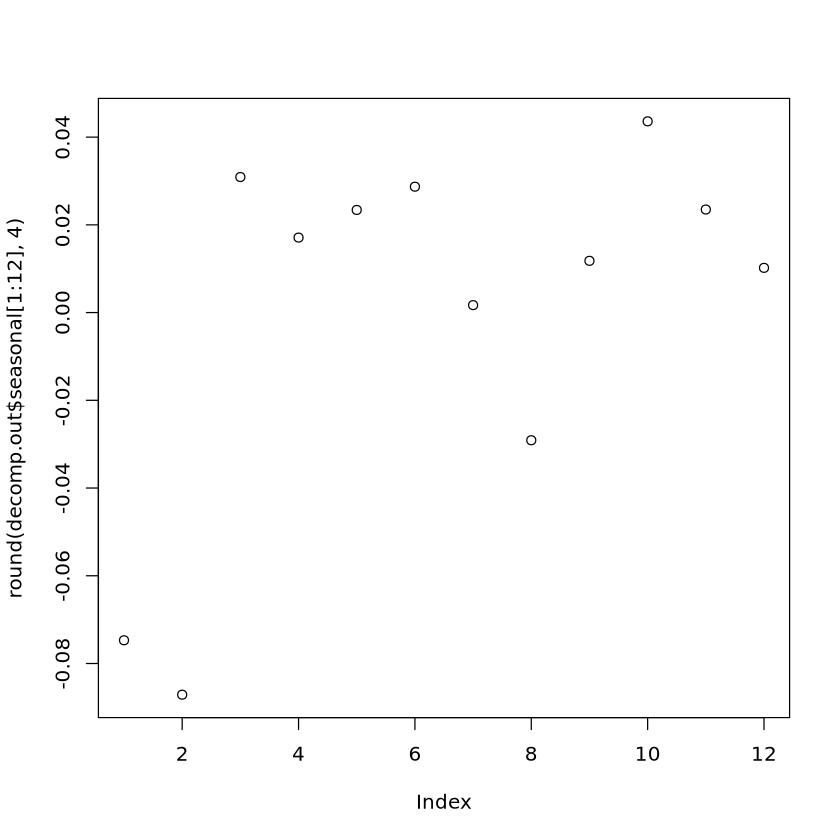

In [14]:
round(decomp.out$seasonal[1:12], 4)
plot(round(decomp.out$seasonal[1:12], 4))

`-` 결과

1988년에 수출은 2월이 가장 작고, 10월이 가장 크다.

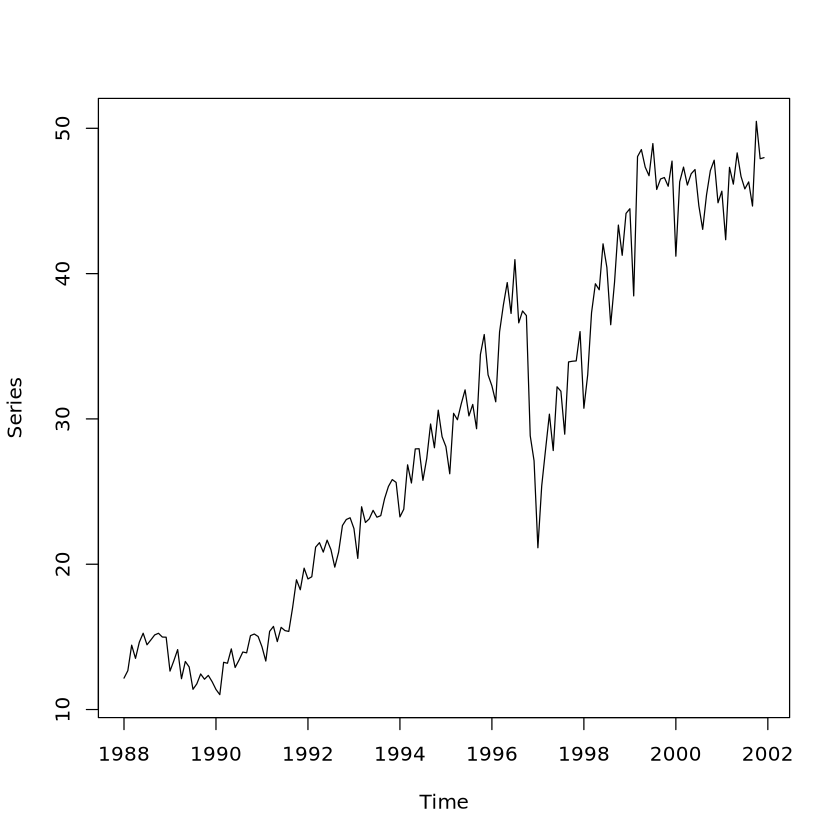

In [16]:
plot(Series)

> 월별 수출액 시도표

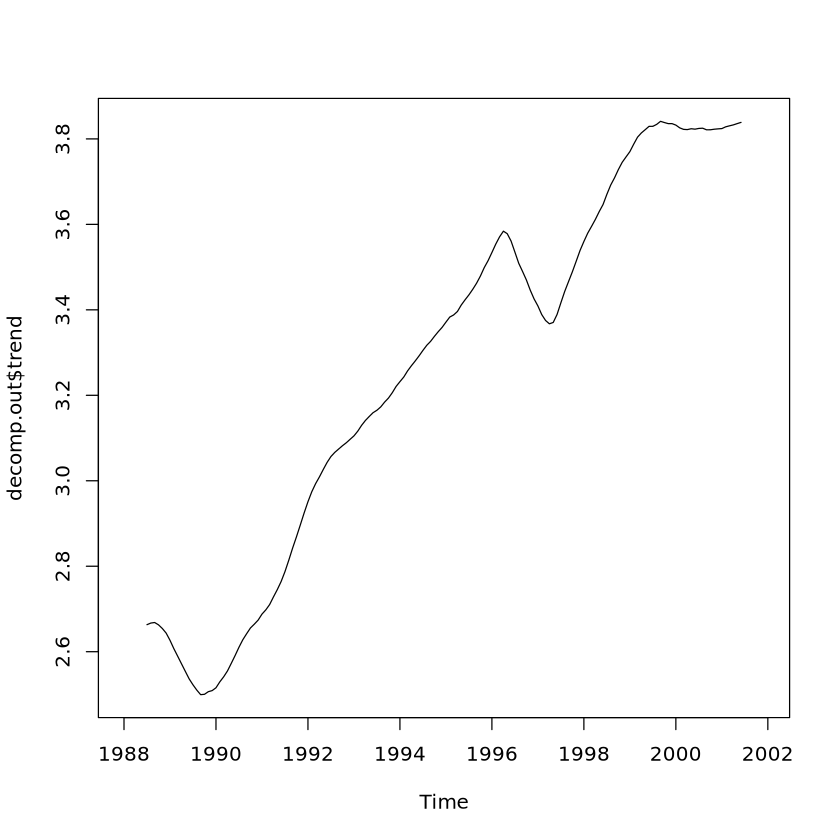

In [15]:
plot(decomp.out$trend)

> 연도별 추세의 시도표. 트렌드만 표시

* 계절성 조정 : 서로 다른 월의 계열값 비교

$\tilde{x_t} = x_t - S_t = T_t + a_t$

>  $exp(\tilde{x_t})$를 도시화해야 함.

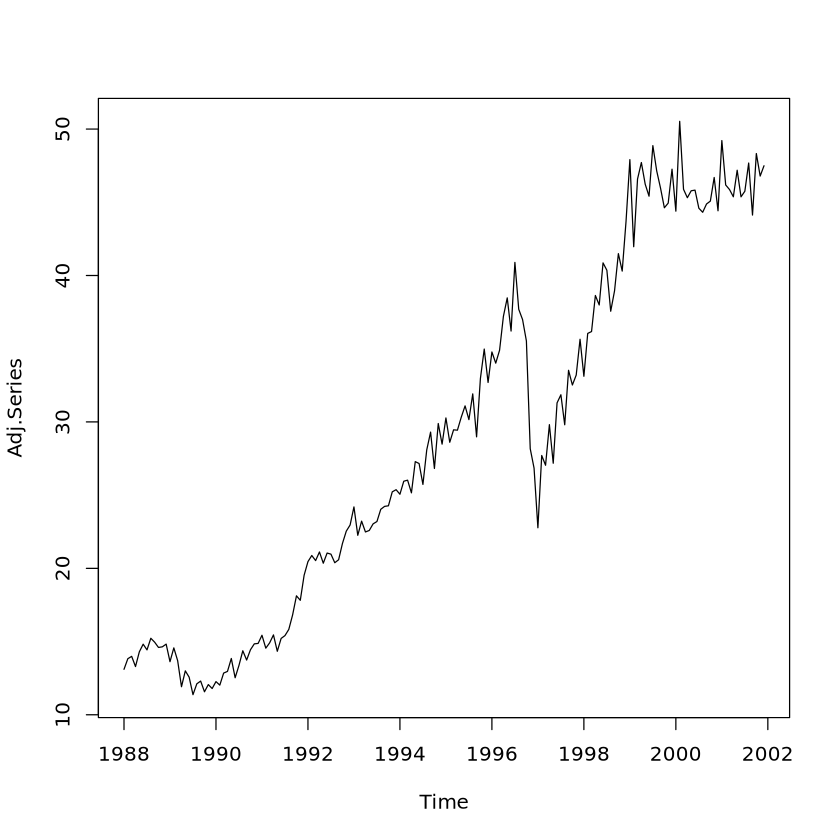

In [20]:
Adjusted = exp(log(Series)-decomp.out$seasonal)
Adj.Series = ts(Adjusted, start = c(1988, 1), frequency = 12)
plot(Adj.Series)

`-` 자기상관과 다중 시계열

* 자기상관함수 : $t$와 $(t - k)$시점 간의 상관관계

$$r_k = \frac{\Sigma_{i = k+1}^{n}(x_i - \bar x)(x_{i-k} - \bar x)}{\Sigma_{i = 1}^{n}(x_i - \bar x)^2}, ~ k : lag$$


ex) $k = 1$인 경우 : 1차 자기상관회귀모형의 $\hat{\rho}$

* 옐로스톤 국립공원의 간헐천 분출 간격

In [22]:
library(MASS)
data(geyser)

In [24]:
options(repr.plot.width = 16, repr.plot.height = 9)

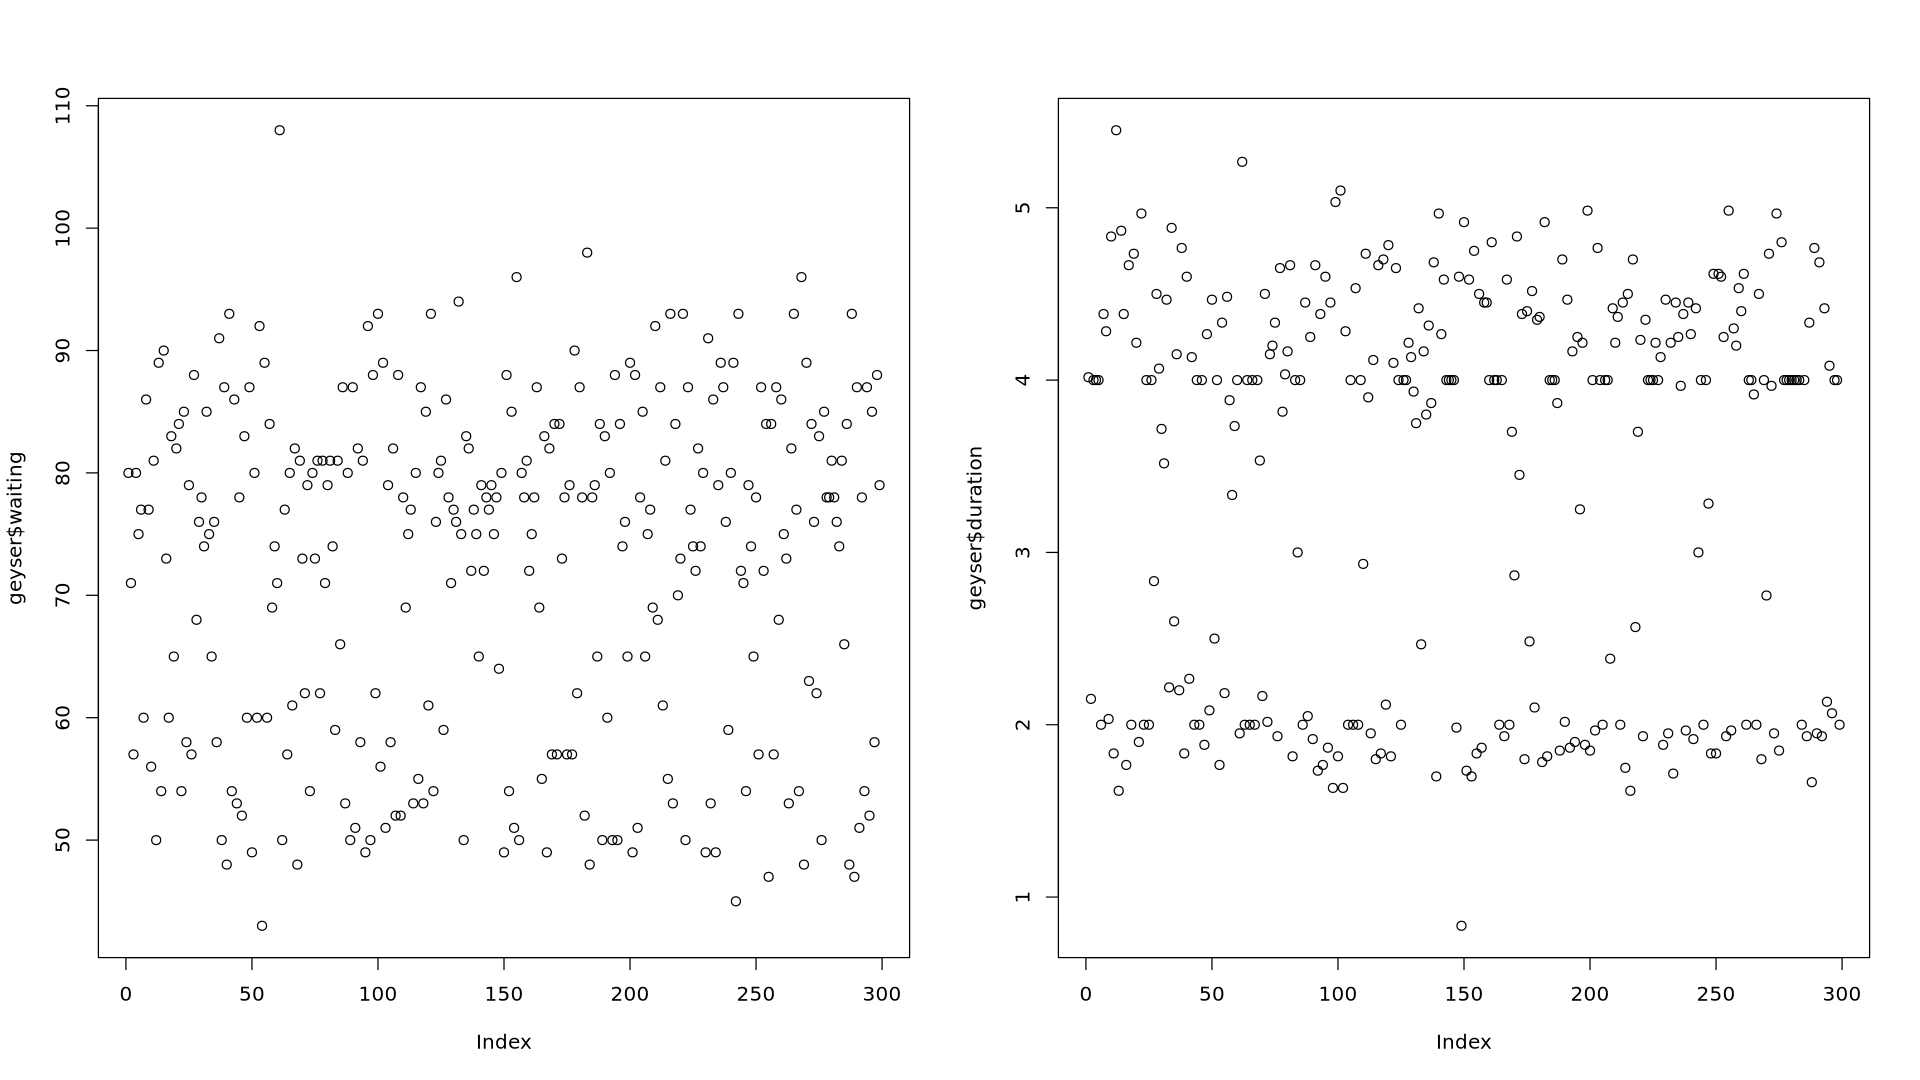

In [26]:
par(mfcol = c(1,2))
plot(geyser$waiting)
plot(geyser$duration)

 $k = 0, 1, 2, 3, 4$에서의 자기상관계수

[1]  1.000 -0.702  0.547 -0.445  0.386


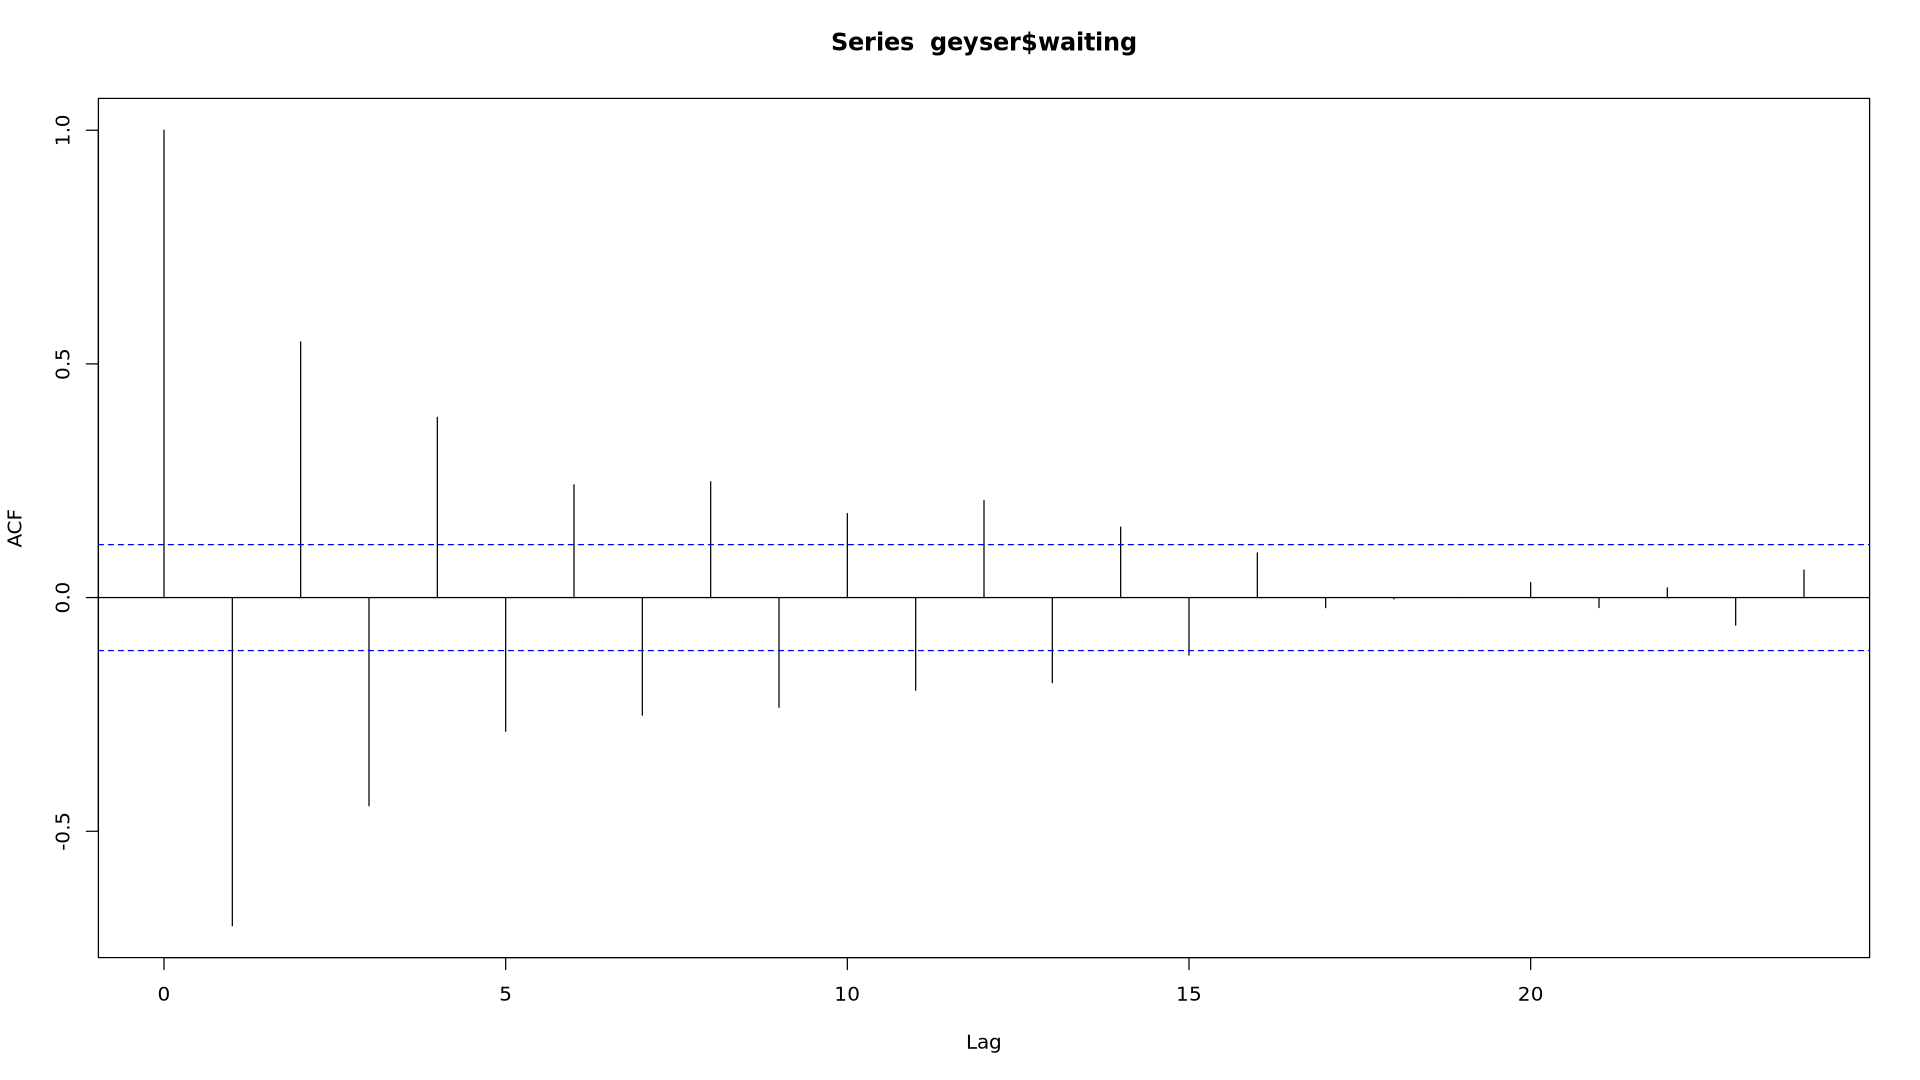

[1]  1.000 -0.657  0.553 -0.398  0.346


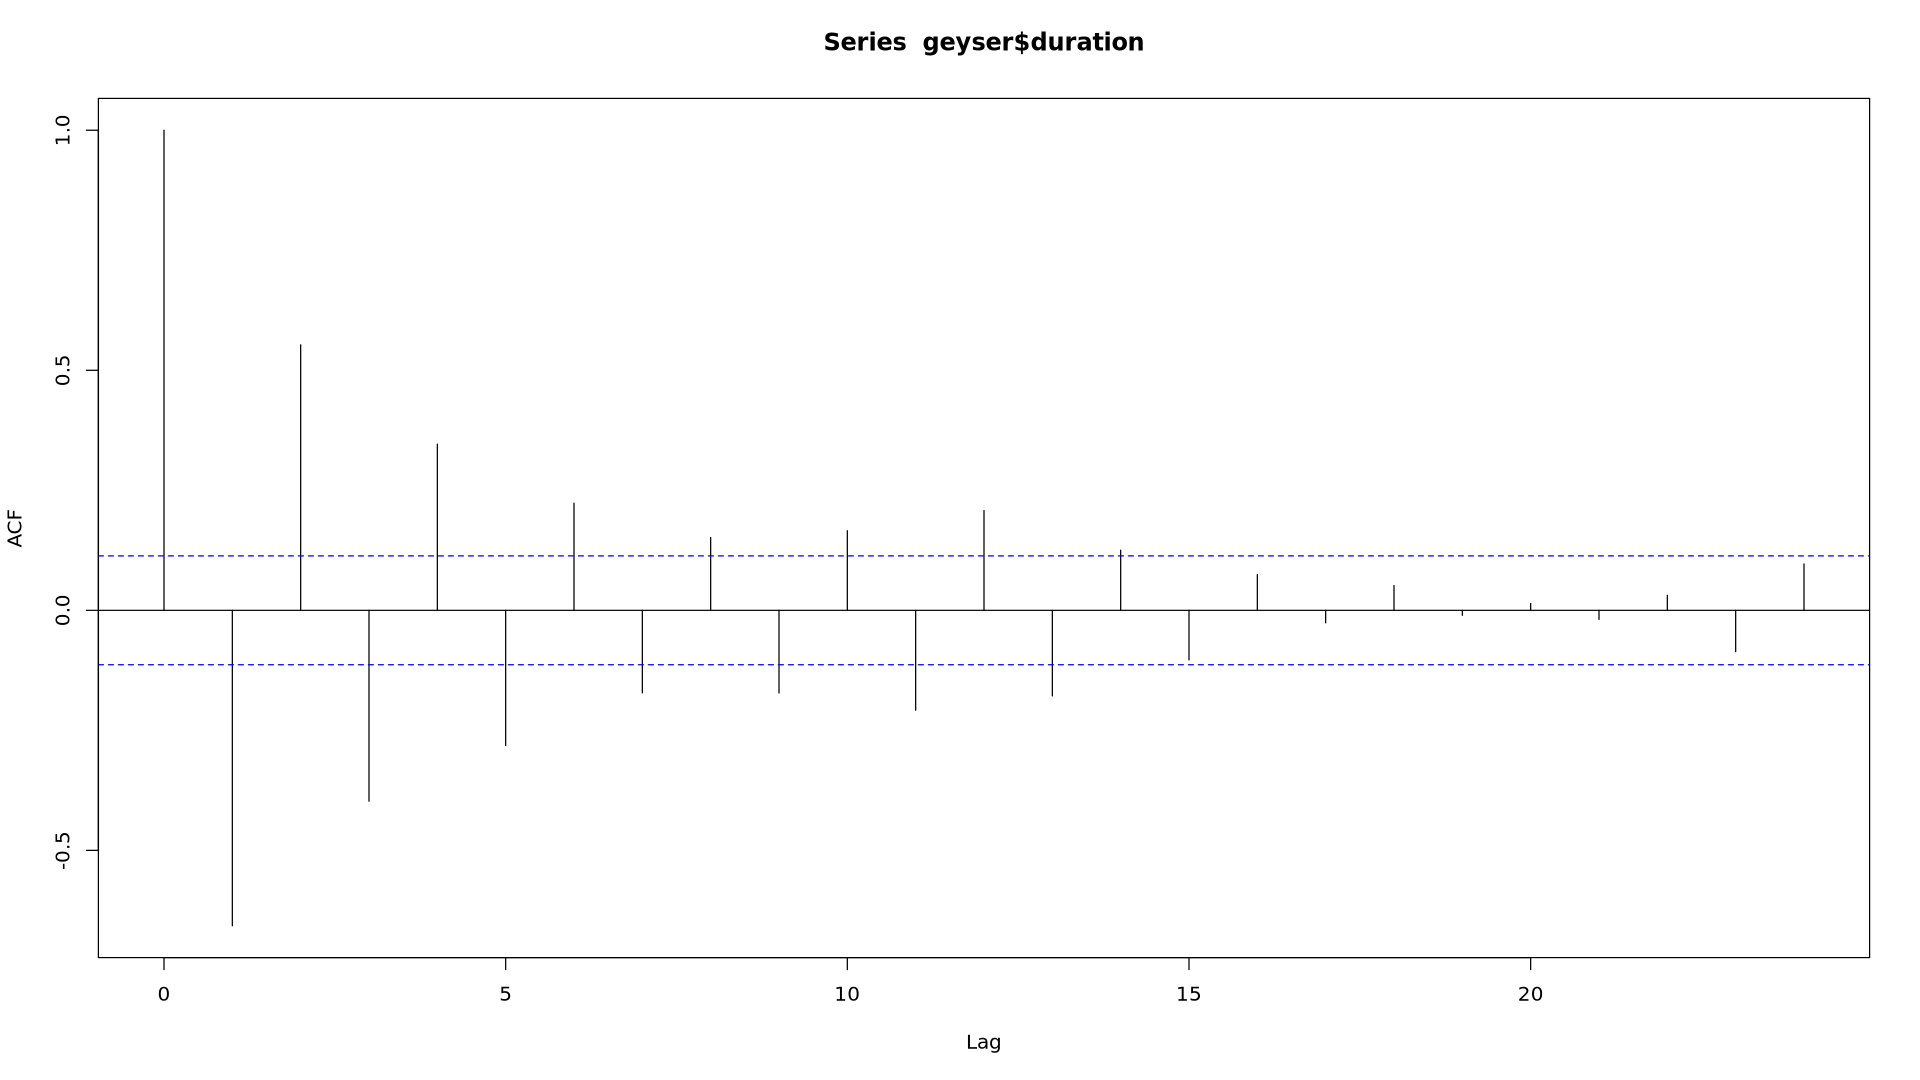

In [32]:
print(round(acf(geyser$waiting)$acf[1:5], 3))  ## 자기상관 플롯을 그려주는 함수인듯.
print(round(acf(geyser$duration)$acf[1:5], 3))

> 두 변수 모두 양과 음이 반복하는 패턴, 한 번 waiting이 길면 다음엔 짧아지고, 다음은 길어짐.

`-` Waiting과 Duration의 관계 : 교차상관계수(CCF)

$$c_k = \frac{\Sigma_{i = k+1}^{n}(x_i - \bar x)(y_{i-k} - \bar y)}{\sqrt{\Sigma_{i = 1}^{n}(x_i - \bar x)^2 \Sigma_{i = 1}^{n}(x_i - \bar x)^2}}, ~ k : lag$$

>  $c_{-1} = cor(x_t, y_{t+1}), ~ c_1 = cor(x_t, y_{t-1})$

-21,0.038
-20,-0.023
-19,-0.005
-18,0.009
-17,0.000
-16,0.009
-15,0.046
-14,-0.079
-13,0.146
-12,-0.166
-11,0.190


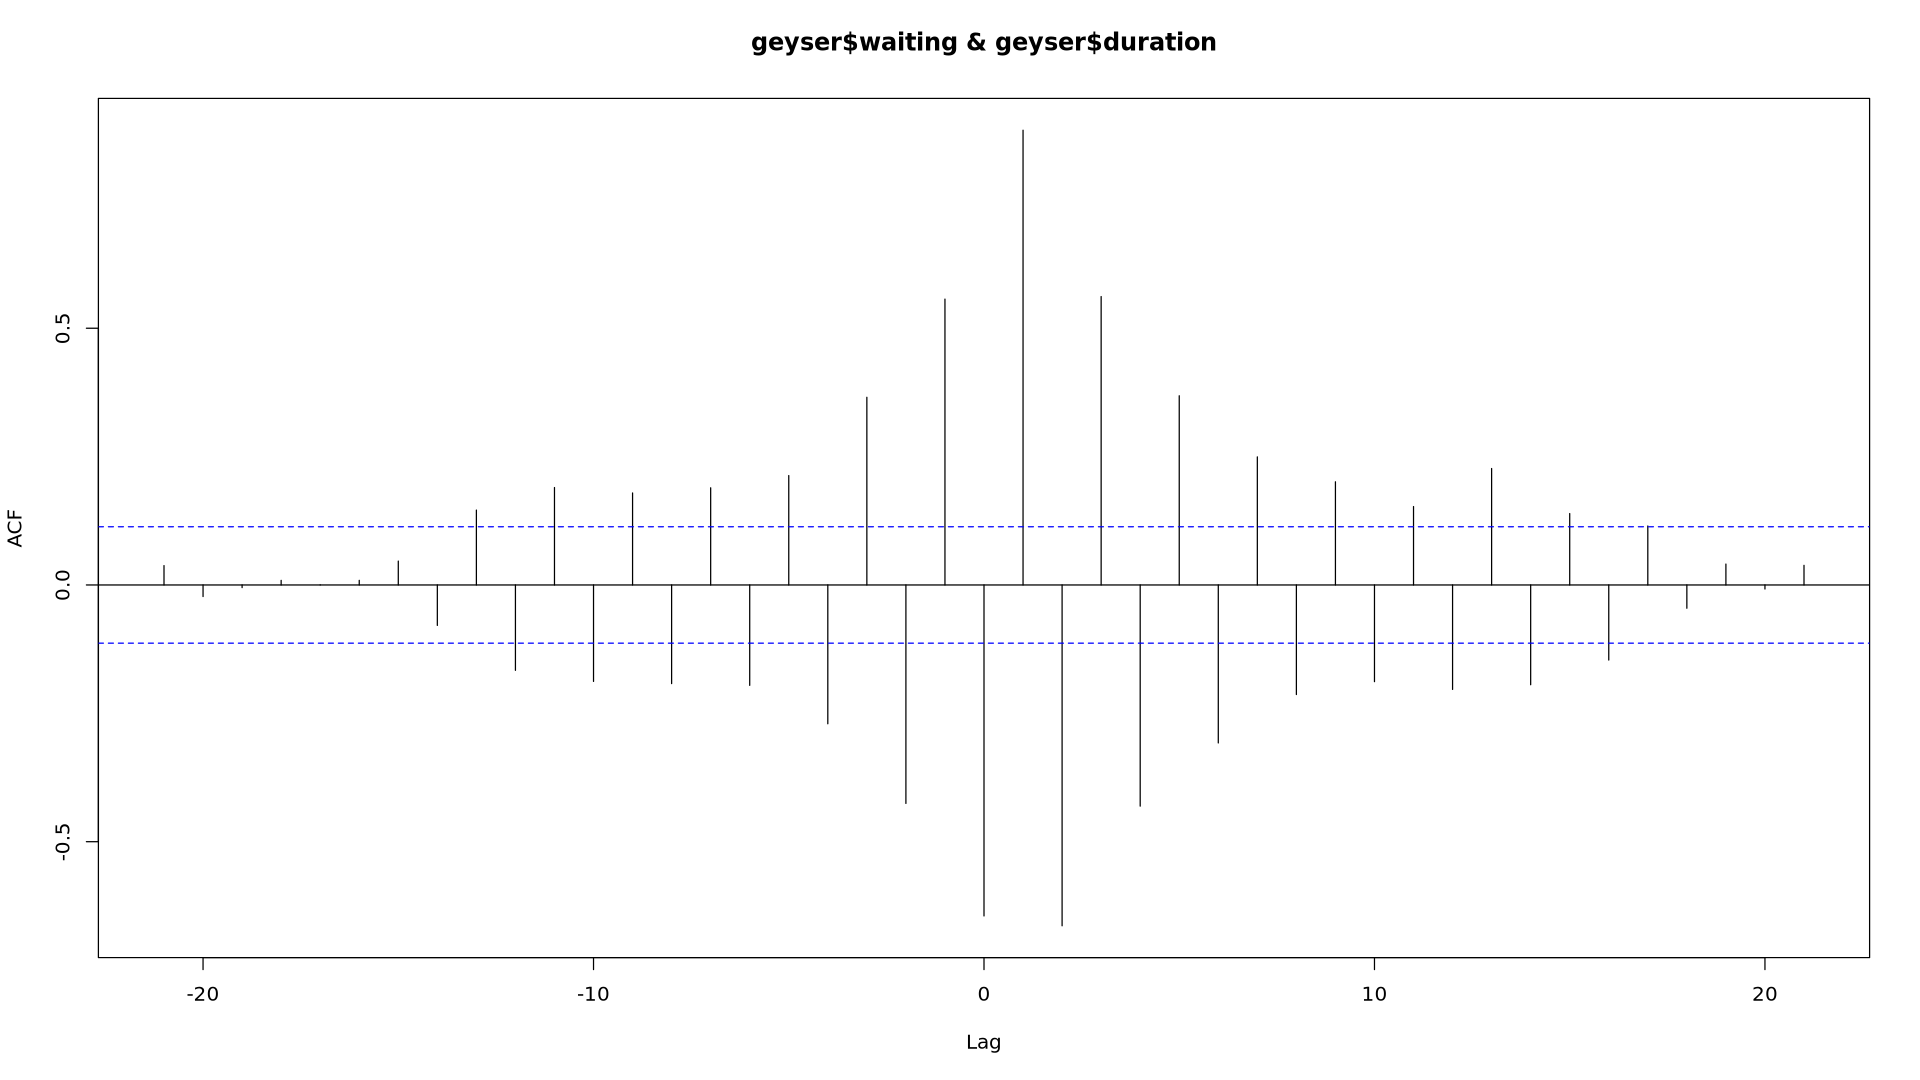

In [34]:
round(cbind(ccf(geyser$waiting, geyser$duration)$lag, ccf(geyser$waiting, geyser$duration)$acf), 3)

`-` 주가 사례 : 임의보행(random work)

$y_t : $ 주가

모형 : $y_t = y_{t-1} + x_t, ~ x_t \overset{i.i.d}{\sim} N(0, \sigma^2)$

>  $x_t = y_t - y_{t-1} :$ t 시점의 변화량(증분)

In [35]:
library(foreign)
ee <- read.spss("EEstock2000.sav")

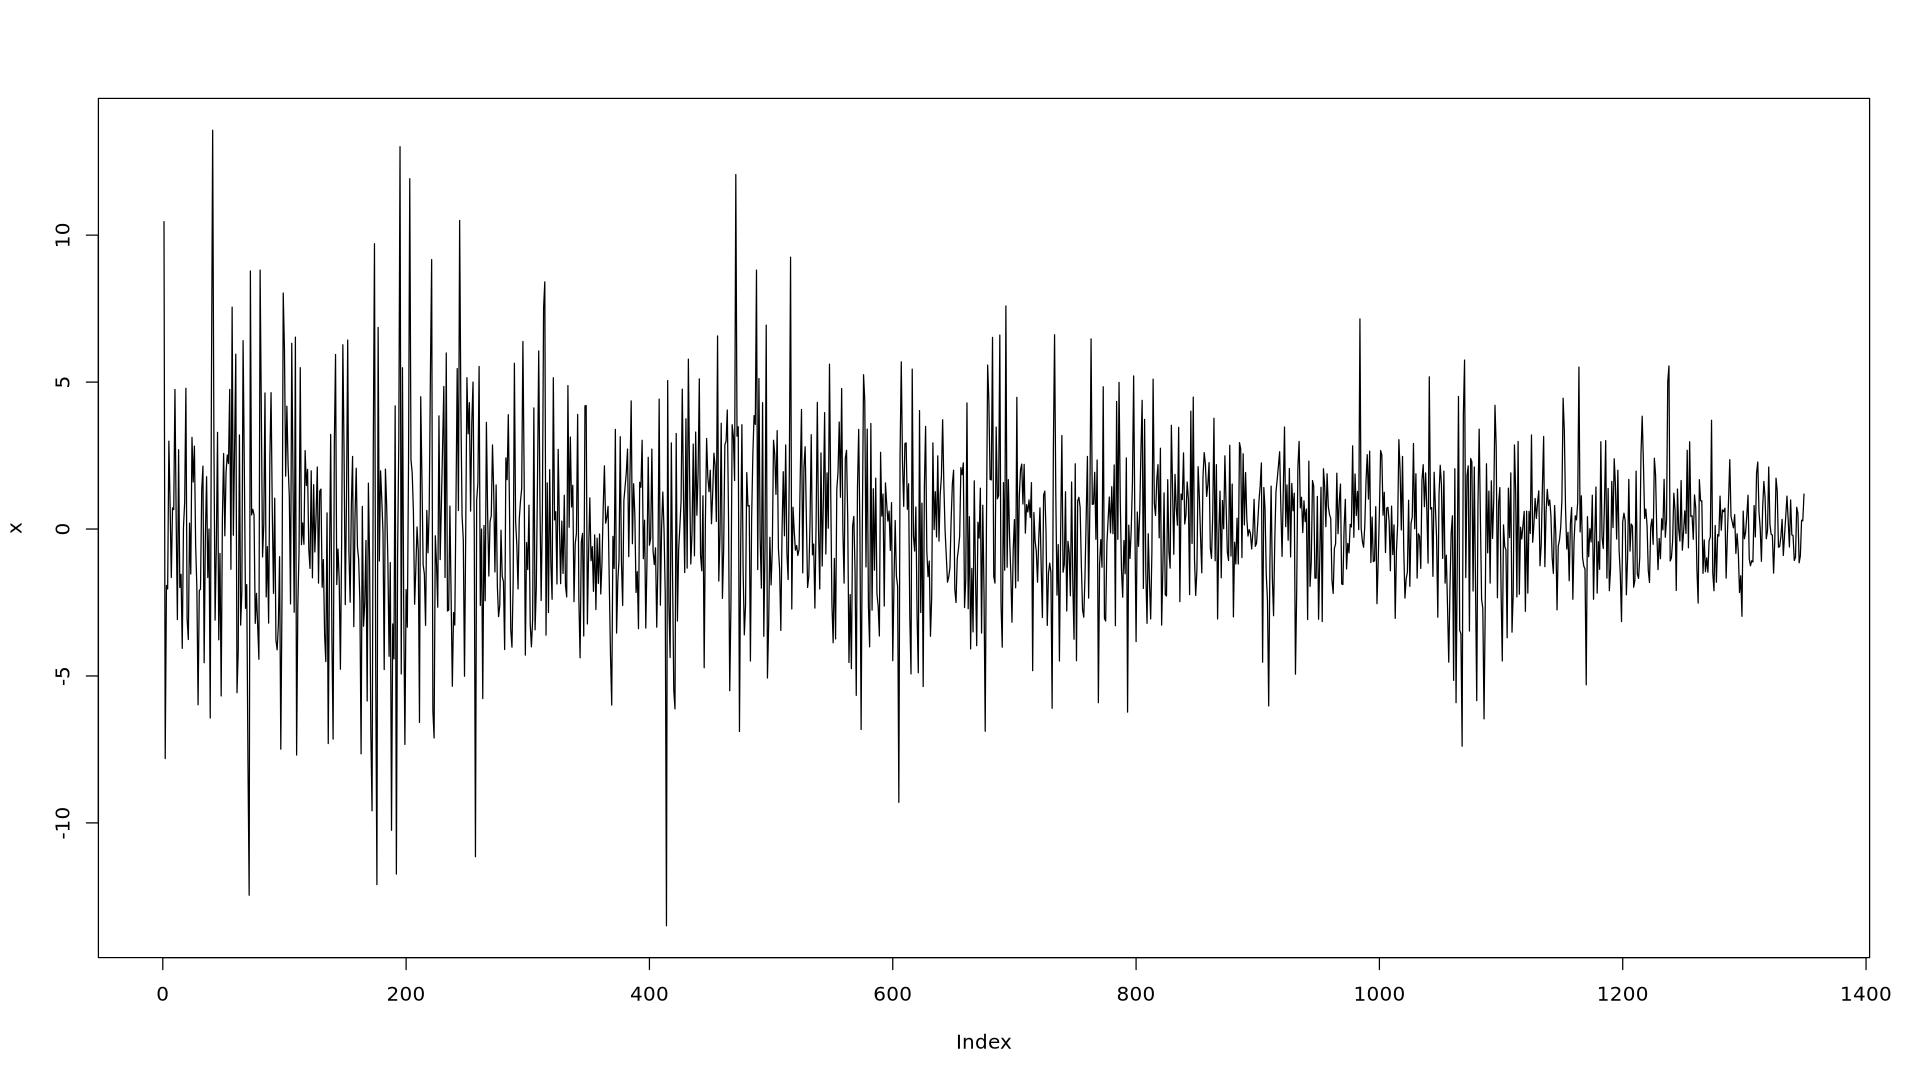

In [37]:
x = ee$change
plot(x, type = 'l')

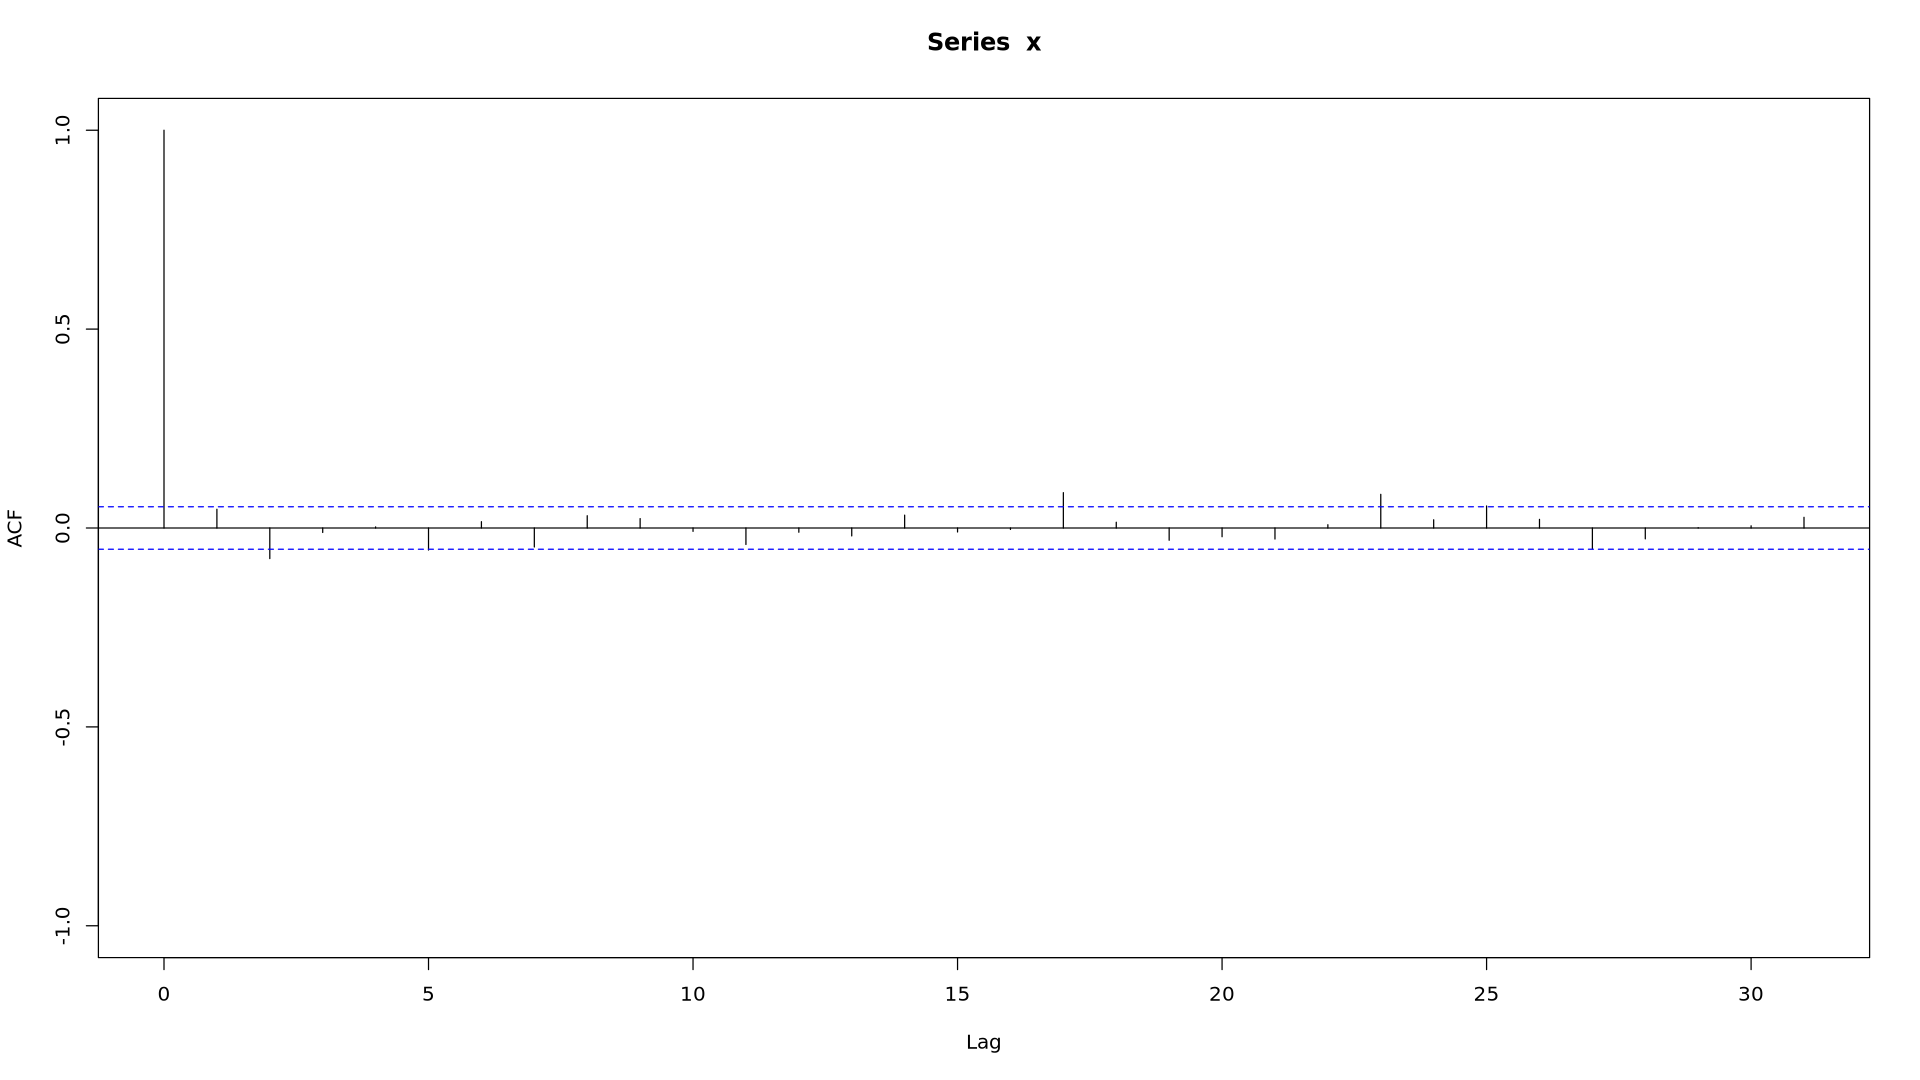

In [39]:
acf(x, ylim = c(-1, 1))

In [40]:
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.96935, p-value = 2.605e-16


> 주가의 증분에 대한 분포는 정규분포를 따르지 않음. 근데 그건 추세까지 오차항으로 해버린거니까 당연히...